## ---------------------- Variáveis ----------------------

*   Company Name: Nome da companhia.
*   Location: Localização onde foi realizada a missão.
*   Datum: Data e hora da missão.
*   Detail: Detalhes sobre a missão.
*   Status Rocket: Status do foguete (Ativo/Inativo).
*   Rocket: Preço da missão (Em milhões de US$).
*   Status Mission: Status/Resultado da missão.

## 1 - Importando as bibliotecas

### 1.1 - Bibliotecas de Análise de Dados

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2 - Importando a base de dados

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
df = pd.read_csv("/content/drive/MyDrive/Space_Corrected.csv")
df

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


Como podemos ver, a base possui **4324 lançamentos**, além de 2 colunas (Unnamed: 0 e Unnamed: 0.1) que são idênticas ao rowID. Por isso, vamos dropar essas colunas, salvando isso em um novo DataFrame, assim evitando mexer nos dados originais.

In [166]:
df1 = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df1.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## 3 - Análise Exploratória dos Dados

### 3.1 - Análise Geral

Vendo quais são as colunas presentes e seus tipos.

In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


Vamos ver a descrição geral das colunas.

In [168]:
df1.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


Podemos ver que a coluna **Status Rocket** possui apenas 2 valores únicos, enquanto **Status Mission** possui 4. Vamos ver quais são e traduzi-los, para melhor compreensão na visualização de gráficos.

In [169]:
df1['Status Rocket'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [170]:
labels_statusRocket = {'StatusRetired':'Inativo', 'StatusActive':'Ativo'}
df1['Status Rocket'] = df1['Status Rocket'].replace(labels_statusRocket)

In [171]:
df1['Status Mission'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [172]:
labels_statusMission = {'Success':'Sucesso', 'Failure':'Falha', 'Partial Failure':'Falha Parcial', 'Prelaunch Failure':'Falha no Pré-lançamento'}
df1['Status Mission'] = df1['Status Mission'].replace(labels_statusMission)

Também vimos que existem valores nulos na coluna **Rocket** (Seção 3.1). Como a quantidade de linhas com essa coluna faltando é muito grande, não é viável excluí-las. Nesse caso, vou apenas substituir por 0.

In [173]:
df1 = df1.fillna(0)

In [174]:
df1[' Rocket'].describe()

count     4324
unique      57
top          0
freq      3360
Name:  Rocket, dtype: int64

Verificando se as colunas foram traduzidas corretamente e se não há mais valores nulos.

In [175]:
df1.isna().sum()

Company Name      0
Location          0
Datum             0
Detail            0
Status Rocket     0
 Rocket           0
Status Mission    0
dtype: int64

In [176]:
df1

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Ativo,50.0,Sucesso
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,Ativo,29.75,Sucesso
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,Ativo,0,Sucesso
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Ativo,65.0,Sucesso
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,Ativo,145.0,Sucesso
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,Inativo,0,Falha
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,Inativo,0,Sucesso
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,Inativo,0,Falha
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,Inativo,0,Sucesso


### 3.2 - Análises Específicas

Agora que já sabemos um pouco sobre a base de dados, podemos realizar a análise em colunas específicas. Vamos começar analisando quantas missões foram bem sucedidas.

In [177]:
df1['Status Mission'].value_counts()

Sucesso                    3879
Falha                       339
Falha Parcial               102
Falha no Pré-lançamento       4
Name: Status Mission, dtype: int64

Das 4324 missões registradas na base, **3879** tiveram sucesso, a grande maioria.

Vamos ver agora a porcentagem de foguetes que ainda são usados, e quantos já saíram de linha.

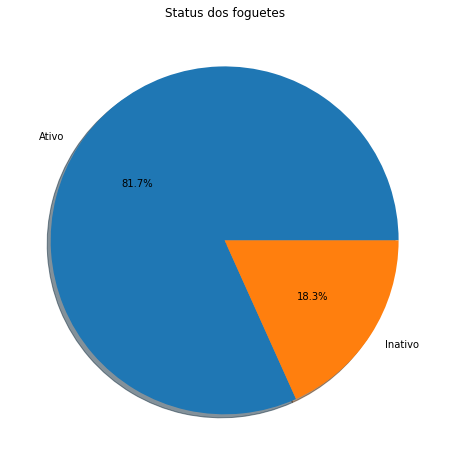

In [178]:
plt.figure(figsize=(8,8))
plt.pie(df1['Status Rocket'].value_counts(), labels = df1['Status Rocket'].unique(), autopct='%1.1f%%', shadow=True)
plt.title("Status dos foguetes")
plt.show()

Analisando agora qual o custo das missões anualmente. Primeiro, é preciso extrair o ano da coluna **Datum**, e em seguida converter o tipo da coluna **Rocket** de string para float.

In [179]:
df1['dataAno'] = pd.to_datetime(df['Datum']).apply(lambda datetime: datetime.year)

In [180]:
df1['dataAno'].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: dataAno, dtype: int64

In [181]:
df1['Rocket'] = df1[' Rocket'].apply(lambda x: str(x).replace(',',''))
df1['Rocket'] = df1['Rocket'].astype('float64')
df1 = df1.drop(columns=' Rocket')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Datum           4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Status Rocket   4324 non-null   object 
 5   Status Mission  4324 non-null   object 
 6   dataAno         4324 non-null   int64  
 7   Rocket          4324 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 270.4+ KB


Com as transformações realizadas, agora é possível desenhar o gráfico de custos anuais.

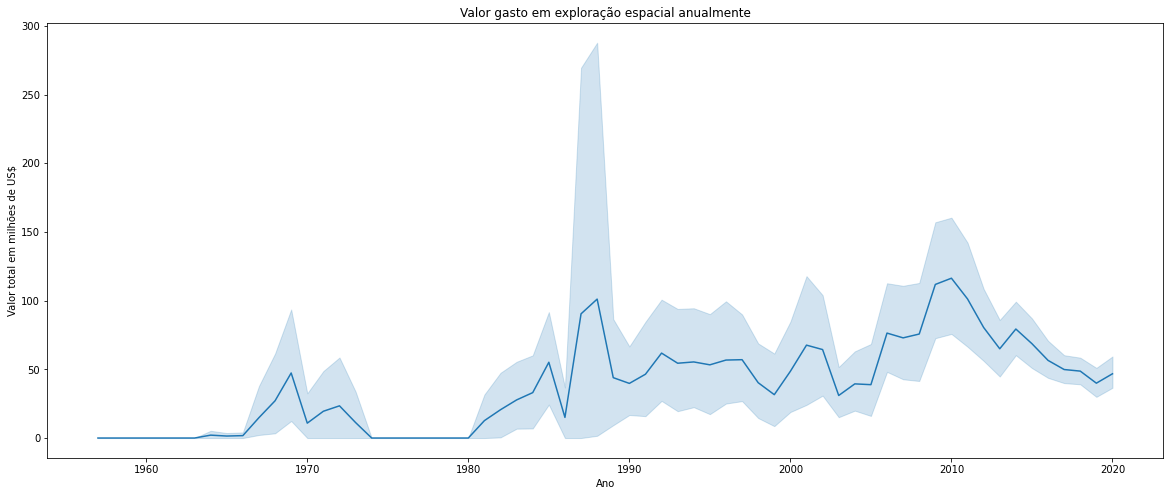

In [182]:
plt.figure(figsize=(20,8))
plt.title("Valor gasto em exploração espacial anualmente")
plt.ylabel("Valor total em milhões de US$")
plt.xlabel("Ano")
sns.lineplot(data=df1, x="dataAno", y="Rocket")

Podemos fazer o mesmo para os meses, dessa vez extraindo da coluna **Datum** os intervalos mensais.

In [183]:
df1['dataMes'] = pd.to_datetime(df['Datum']).apply(lambda datetime: datetime.month)

In [184]:
df1['dataMes'].head()

0    8
1    8
2    8
3    7
4    7
Name: dataMes, dtype: int64

In [185]:
df1['dataMes'].describe()

count    4324.000000
mean        6.754163
std         3.417027
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: dataMes, dtype: float64

Traduzindo os valores para melhor visualização.

In [186]:
df1['dataMes'] = df1['dataMes'].astype('str')
labels_months = {'1':'Janeiro', '2':'Fevereiro', '3':'Março', '4':'Abril', '5':'Maio', '6':'Junho', '7':'Julho', '8':'Agosto', '9':'Setembro', '10':'Outubro', '11':'Novembro', '12':'Dezembro'}
df1['dataMes'] = df1['dataMes'].replace(labels_months)

In [187]:
df1['dataMes'].head()

0    Agosto
1    Agosto
2    Agosto
3     Julho
4     Julho
Name: dataMes, dtype: object

Com os meses devidamente traduzidos, vamos analisar a média de valores gastos para cada mês do ano.

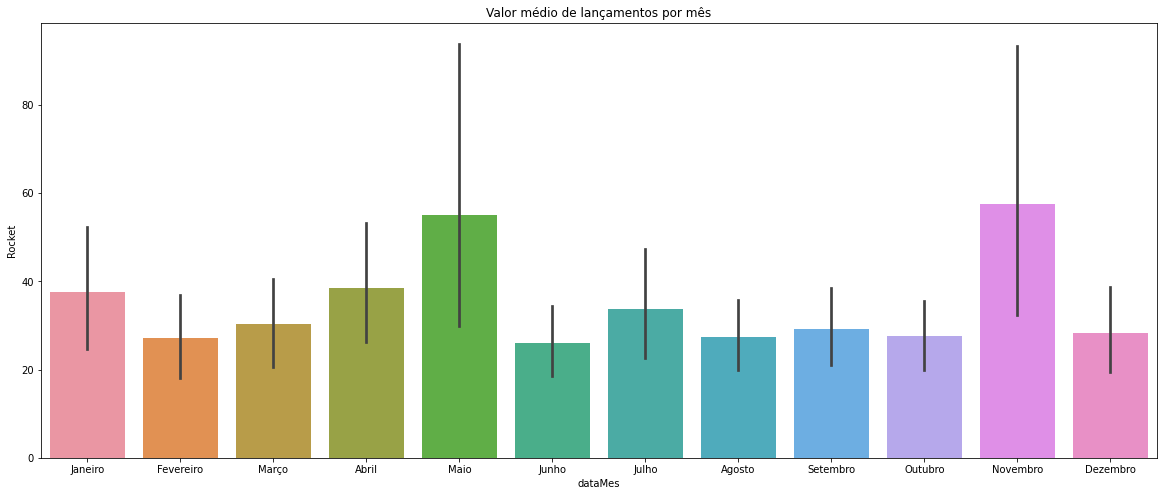

In [188]:
plt.figure(figsize = (20,8))
plt.title("Valor médio de lançamentos por mês")
plt.xlabel(" ")
plt.ylabel("Valor Médio dos lançamentos")
sns.barplot(x="dataMes", y="Rocket", data=df1, order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']);

Em seguida, vamos ver qual companhia possui mais lançamentos registrados.

Text(0.5, 1.0, 'Quantidade de lançamentos registrados por companhia')

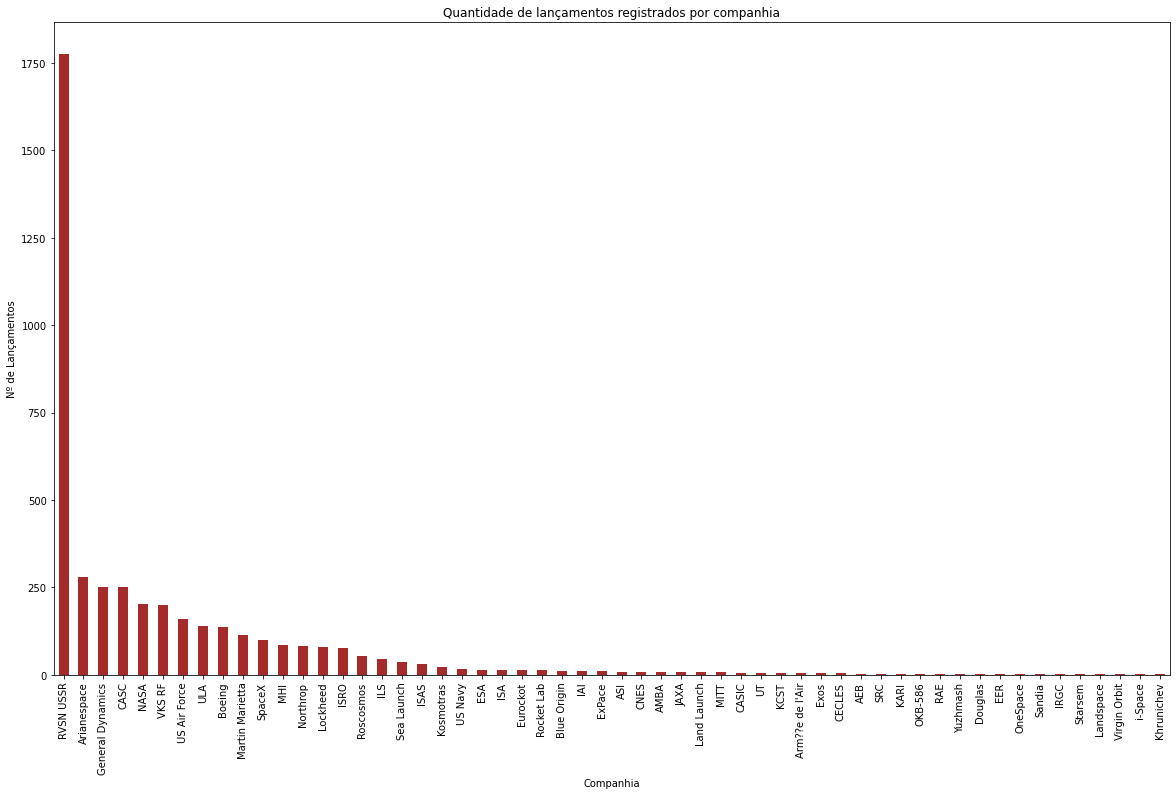

In [189]:
plt.figure(figsize=(20,12))
df1['Company Name'].value_counts().plot(kind='bar',color='brown')
plt.xlabel("Companhia")
plt.ylabel("Nº de Lançamentos")
plt.title("Quantidade de lançamentos registrados por companhia")

Vamos analisar quanto cada companhia já gastou em lançamentos.

In [190]:
df1.groupby('Company Name').Rocket.sum()

Company Name
AEB                     0.00
AMBA                    0.00
ASI                     0.00
Arianespace         16345.00
Arm??e de l'Air         0.00
Blue Origin             0.00
Boeing               1241.00
CASC                 6340.26
CASIC                   0.00
CECLES                  0.00
CNES                    0.00
Douglas                 0.00
EER                    20.00
ESA                    37.00
Eurockot              543.40
ExPace                 28.30
Exos                    0.00
General Dynamics        0.00
IAI                     0.00
ILS                  1320.00
IRGC                    0.00
ISA                     0.00
ISAS                    0.00
ISRO                 2177.00
JAXA                  168.00
KARI                    0.00
KCST                    0.00
Khrunichev              0.00
Kosmotras             638.00
Land Launch             0.00
Landspace               0.00
Lockheed              280.00
MHI                  3532.50
MITT                    0.00
M

Para melhor visualização, vamos colocar essas informações em um gráfico.

Text(0.5, 1.0, 'Valor total dos lançamentos registrados por companhia')

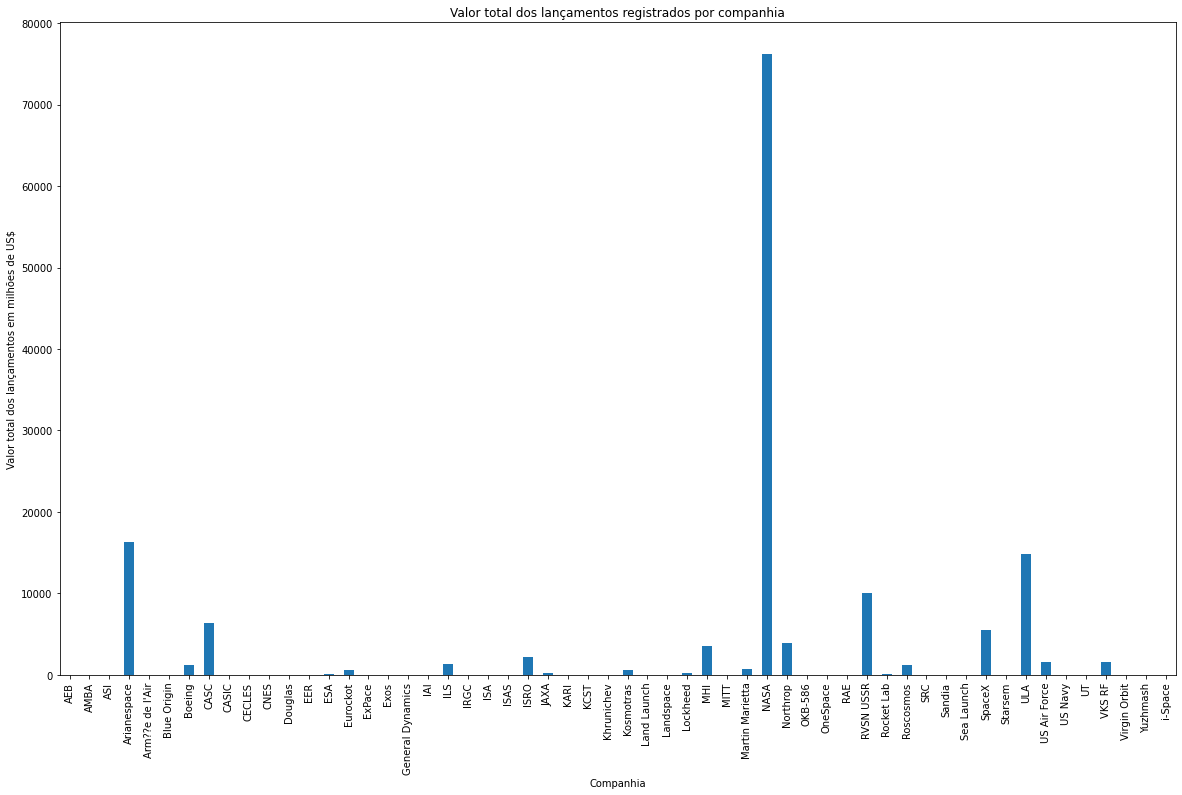

In [191]:
plt.figure(figsize=(20,12))
df1.groupby('Company Name').Rocket.sum().plot(kind='bar')
plt.xlabel("Companhia")
plt.ylabel("Valor total dos lançamentos em milhões de US$")
plt.title("Valor total dos lançamentos registrados por companhia")

Com os gráficos acima, é possível concluir que a **NASA** foi a companhia que **mais investiu** em exploração espacial, enquanto a **URSS** realizou **mais missões** ao longo dos anos.

Descobrindo agora quais companhias tiveram mais sucesso em missões.

In [192]:
df2 = df1[df1['Status Mission'] == 'Sucesso']
df2.groupby('Company Name')['Status Mission'].value_counts()

Company Name      Status Mission
AMBA              Sucesso              4
ASI               Sucesso              9
Arianespace       Sucesso            269
Arm??e de l'Air   Sucesso              3
Blue Origin       Sucesso             12
Boeing            Sucesso            131
CASC              Sucesso            231
CASIC             Sucesso              3
CECLES            Sucesso              1
CNES              Sucesso              6
Douglas           Sucesso              1
ESA               Sucesso              9
Eurockot          Sucesso             12
ExPace            Sucesso              9
General Dynamics  Sucesso            203
IAI               Sucesso              9
ILS               Sucesso             45
IRGC              Sucesso              1
ISA               Sucesso              4
ISAS              Sucesso             26
ISRO              Sucesso             63
JAXA              Sucesso              6
KARI              Sucesso              1
KCST              Sucess

Text(0.5, 1.0, 'Quantidade de lançamentos realizados com sucesso por companhia')

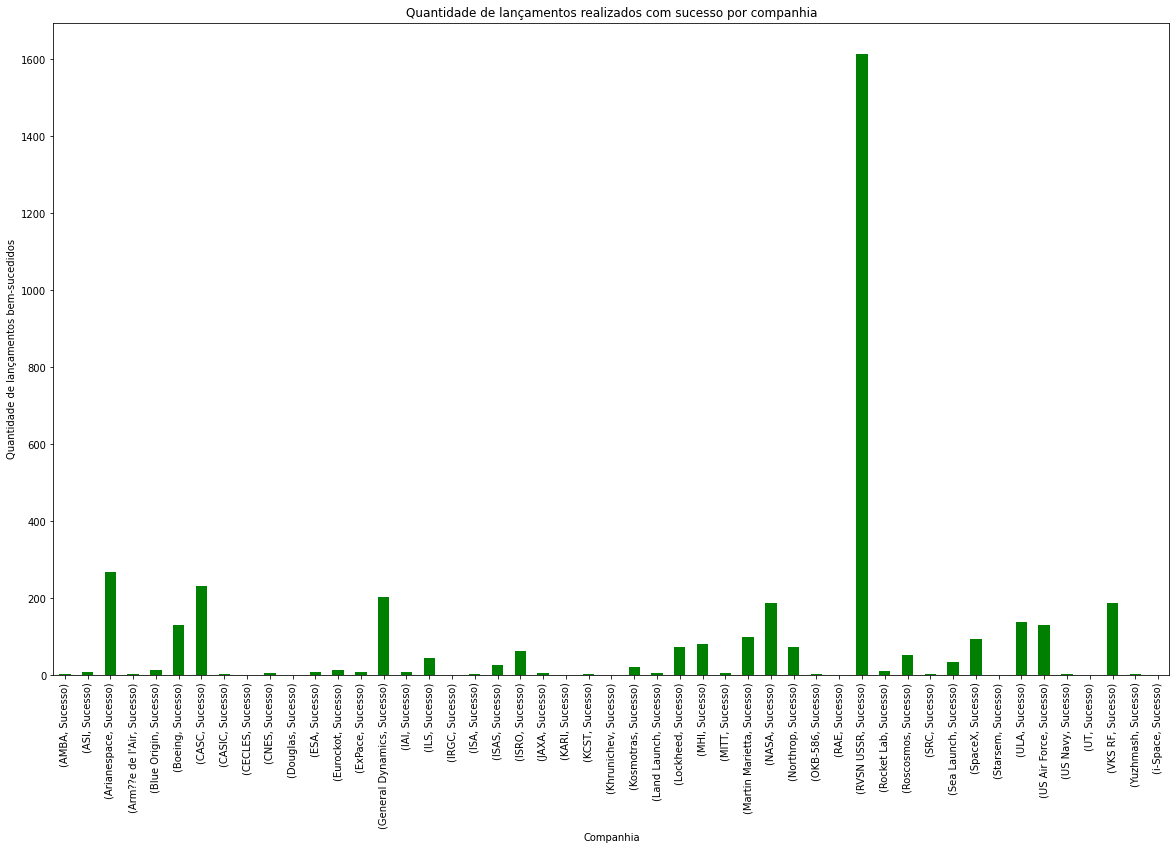

In [204]:
plt.figure(figsize=(20,12))
df2.groupby('Company Name')['Status Mission'].value_counts().plot(kind='bar', color='green')
plt.xlabel("Companhia")
plt.ylabel("Quantidade de lançamentos bem-sucedidos")
plt.title("Quantidade de lançamentos realizados com sucesso por companhia")

Analisando agora quais companhias tiveram mais falhas.

In [194]:
df3 = df1[df1['Status Mission'] != 'Sucesso']
df4 = df3.groupby('Company Name')['Status Mission'].value_counts()

In [195]:
df4.head()

Company Name  Status Mission         
AEB           Falha                      2
              Falha no Pré-lançamento    1
AMBA          Falha                      3
              Falha Parcial              1
Arianespace   Falha                      7
Name: Status Mission, dtype: int64

Text(0.5, 1.0, 'Quantidade de lançamentos com falha registrados por companhia')

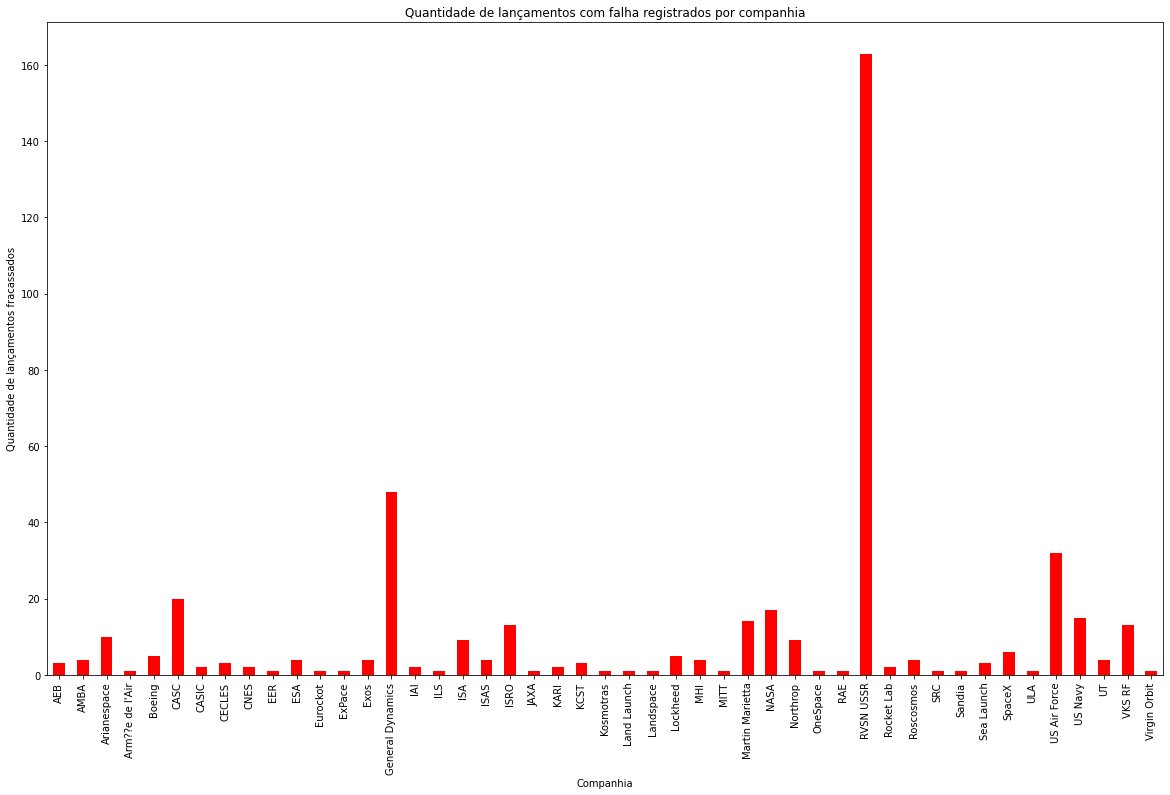

In [205]:
plt.figure(figsize=(20,12))
df4.groupby('Company Name').sum().plot(kind='bar',color='red')
plt.xlabel("Companhia")
plt.ylabel("Quantidade de lançamentos fracassados")
plt.title("Quantidade de lançamentos com falha registrados por companhia")

Como o número de lançamentos por companhia não é distribuição homogênea, faz sentido visualizar a porcentagem de sucesso ao invés do número absoluto. Vamos fazer isso.

In [197]:
# Quantidade total de lançamentos
df1['Company Name'].value_counts()

# Numero de falhas por companhia
df5 = df4.groupby('Company Name').sum()

# Numero de sucesso por companhia
df6 = df2.groupby('Company Name')['Status Mission'].value_counts()

In [198]:
df6.head()

Company Name     Status Mission
AMBA             Sucesso             4
ASI              Sucesso             9
Arianespace      Sucesso           269
Arm??e de l'Air  Sucesso             3
Blue Origin      Sucesso            12
Name: Status Mission, dtype: int64

In [199]:
porcentagemSucesso = df6.groupby('Company Name').sum() / df1['Company Name'].value_counts()


Text(0.5, 1.0, 'Porcentagem de lançamentos realizados com sucesso por companhia')

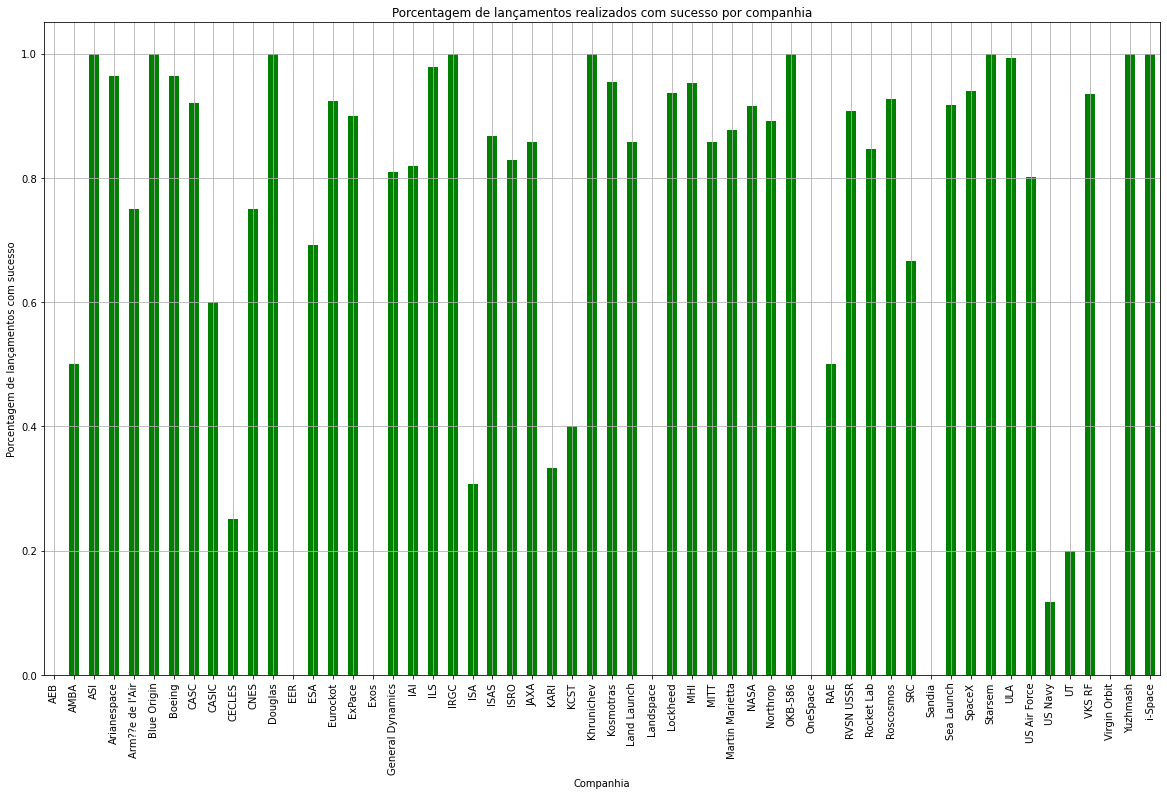

In [200]:
plt.figure(figsize=(20,12))
porcentagemSucesso.plot(kind='bar',color='green', grid=True)
plt.xlabel("Companhia")
plt.ylabel("Porcentagem de lançamentos com sucesso")
plt.title("Porcentagem de lançamentos realizados com sucesso por companhia")

Vamos fazer o mesmo para as falhas.

In [201]:
porcentagemFalha = df5 / df1['Company Name'].value_counts()

Text(0.5, 1.0, 'Porcentagem de lançamentos realizados com falha por companhia')

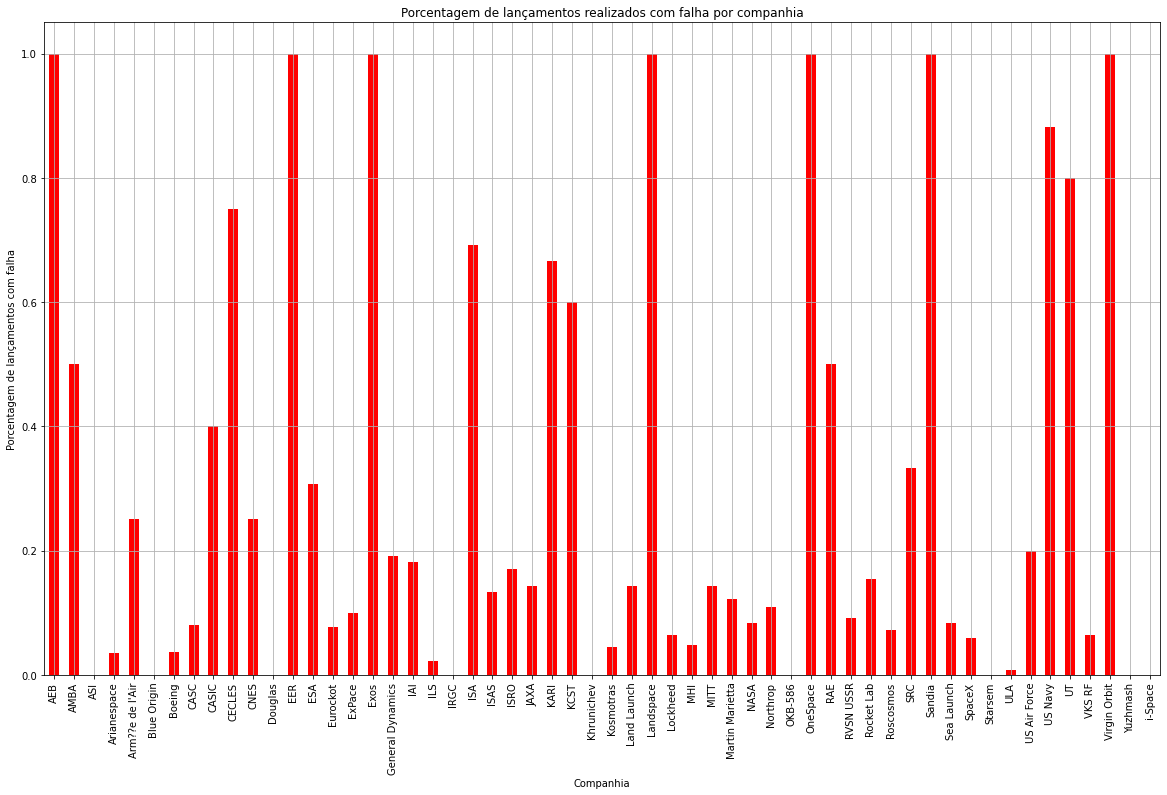

In [202]:
plt.figure(figsize=(20,12))
porcentagemFalha.plot(kind='bar',color='red', grid=True)
plt.xlabel("Companhia")
plt.ylabel("Porcentagem de lançamentos com falha")
plt.title("Porcentagem de lançamentos realizados com falha por companhia")

Por fim, também podemos analisar qual foi o tipo de falha mais comum durante as missões.

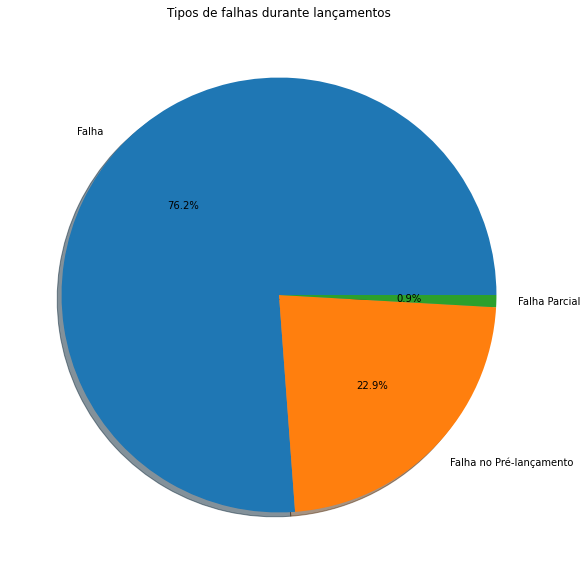

In [203]:
plt.figure(figsize=(10,10))
plt.pie(df3['Status Mission'].value_counts(), labels = df3['Status Mission'].unique(), autopct='%1.1f%%', shadow=True)
plt.title("Tipos de falhas durante lançamentos")
plt.show()